----------------------------------------------------------------------------------------
# Importing neccesary Libraries
----------------------------------------------------------------------------------------

In [1]:
# Math Libraries
import numpy as np

# For Calculation of Z Scores
from scipy.stats import zscore

# to handle data in form of rows and columns 
import pandas as pd

# To import scikit Libraries for splitting the data into test/training sets
from sklearn.model_selection import train_test_split

# To Import KNN Library
from sklearn.neighbors import KNeighborsClassifier

# To Import Logistic Regression Library
from sklearn.linear_model import LogisticRegression

# To Import Naive Bayes Library
from sklearn.naive_bayes import GaussianNB

#To compute Confusion Matrix and Precision
from sklearn import metrics

# Visualization Libraries from Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

----------------------------------------------------------------------------------------
# Importing and Preprocessing Data Frame
----------------------------------------------------------------------------------------

## 1. Reading the CSV file into pandas dataframe

In [2]:
bpl_df = pd.read_csv("Bank_Personal_Loan_Modelling (1).csv")  
bpl_df.shape

(5000, 14)

## 2. Replacing Categorical variable -> Education with Dummy Variables

In [3]:
bpl_df['Education'] = bpl_df['Education'].replace({1: 'Undergrad', 2: 'Grad', 3: 'Advanced'})
bpl_df = pd.get_dummies(bpl_df, columns= ['Education'])
bpl_df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Grad,Education_Undergrad
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


## 3. Dropping any irrelevant(to our model) columns to save computation and resources

In [4]:
# dropping the ID and ZIP Code columns as they is useless for the model
bpl_df= bpl_df.drop(['ID','ZIP Code'], axis=1 )
bpl_df.head(5)

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Grad,Education_Undergrad
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


## 4.Check for any NULL Value or any Non Numerical/NaN Values

In [5]:
bpl_df.isnull().sum()

Age                    0
Experience             0
Income                 0
Family                 0
CCAvg                  0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
Education_Advanced     0
Education_Grad         0
Education_Undergrad    0
dtype: int64

In [6]:
bpl_df.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                   int64
CCAvg                  float64
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
Education_Advanced       uint8
Education_Grad           uint8
Education_Undergrad      uint8
dtype: object

# NOTE:
### 1. There are no missing values
### 2. The datatypes confirm presence of only numerical values.

----------------------------------------------------------------------------------------
# Studying the data distribution in each attribute and checking any possible correlation between them.
----------------------------------------------------------------------------------------

## 1. Numerically Analysis of Data

In [7]:
bpl_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


## 2. Graphical Analysis of Data

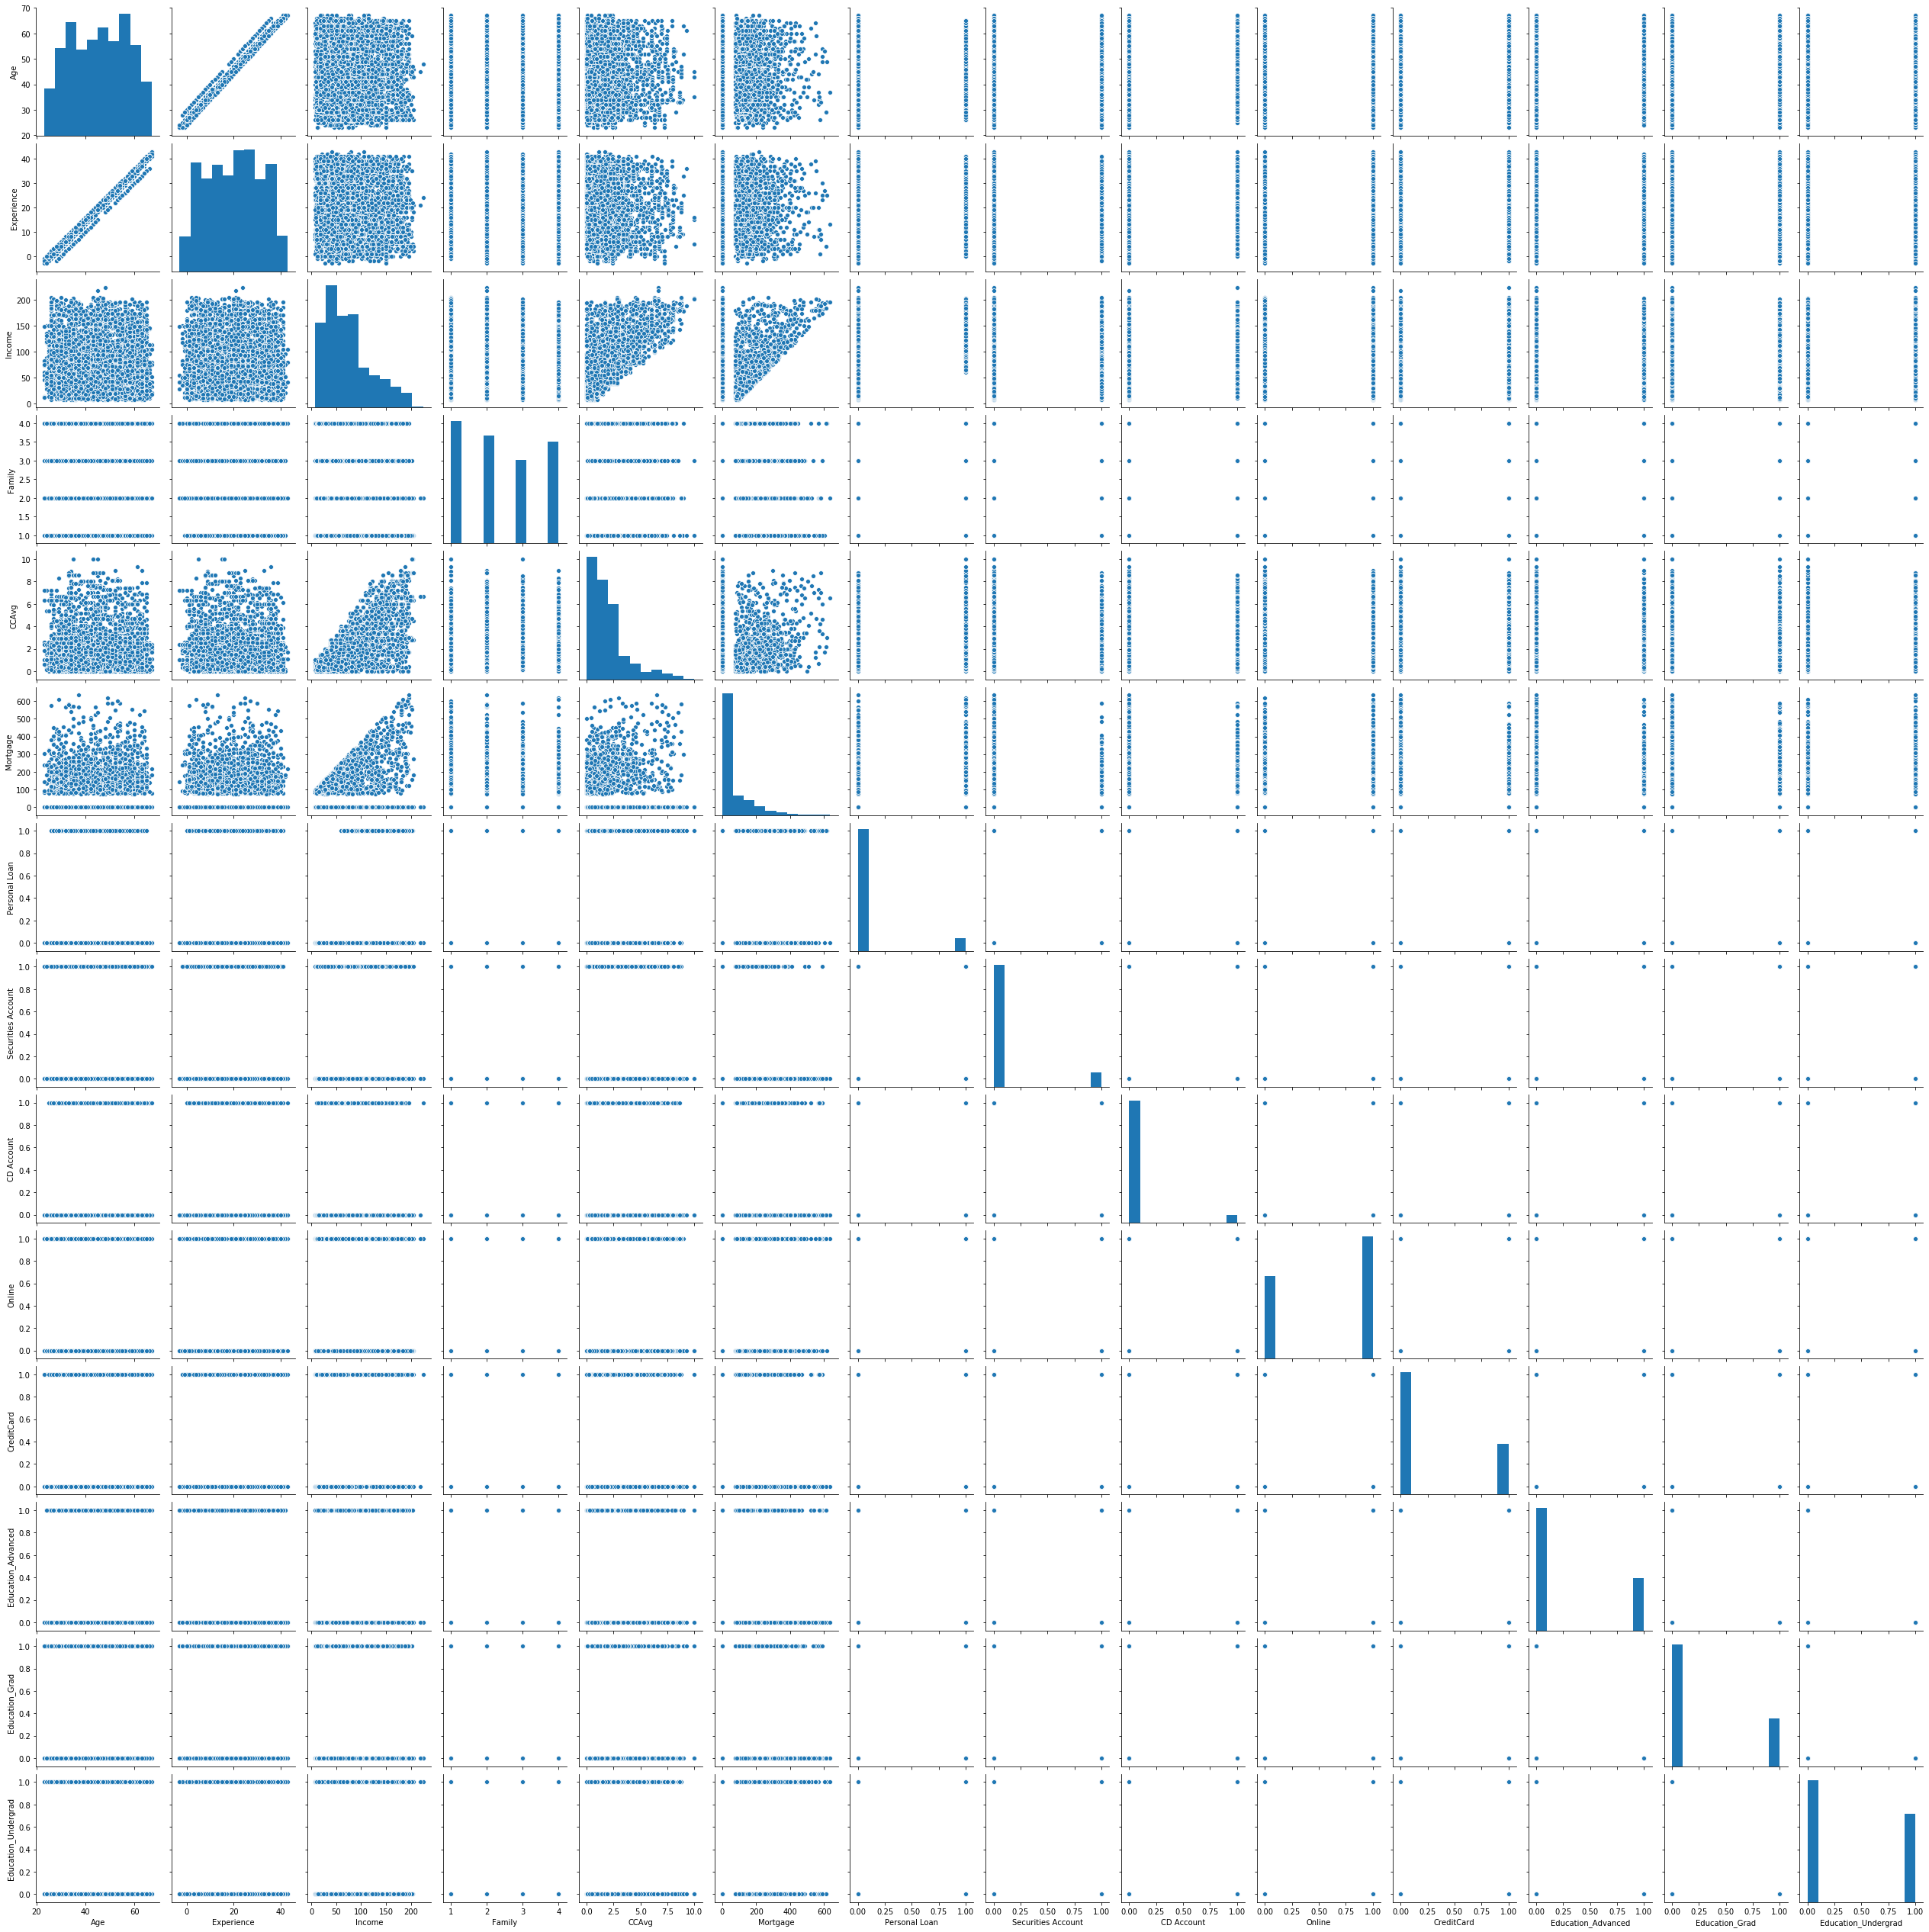

In [9]:
sns.pairplot(bpl_df)

## 3. Finding Corelation among Columns which seems to be related

In [10]:
bpl_df.corr()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Grad,Education_Undergrad
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,0.045838,-0.016264,-0.027770
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967,0.020967,-0.018197,-0.002907
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,-0.108878,-0.128364,0.218019
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,-0.008744,0.139201,-0.118628
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,-0.080413,-0.090366,0.156979
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,-0.014942,-0.031806,0.042841
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,0.090212,0.071491,-0.148894
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,-0.012421,0.005134,0.006863
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,0.009780,0.006089,-0.014630
Online,0.013702,0.013898,0.014206,0.010354,-0.003611,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210,-0.023837,0.020590,0.003394


## 4. Checking Distribution of Continious Variables for Outliers

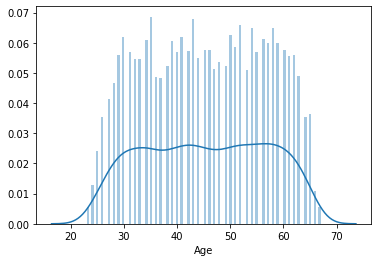

In [11]:
sns.distplot(bpl_df['Age'], hist= True, kde= True, bins=100)

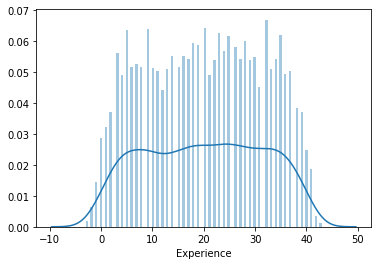

In [12]:
sns.distplot(bpl_df['Experience'], hist= True, kde= True, bins=100)

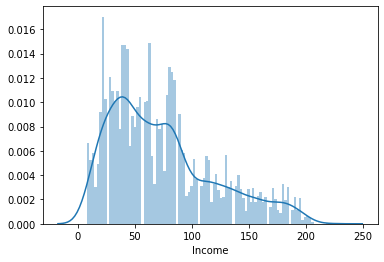

In [13]:
sns.distplot(bpl_df['Income'], hist= True, kde= True, bins=100)

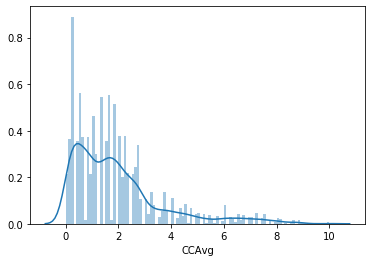

In [14]:
sns.distplot(bpl_df['CCAvg'], hist= True, kde= True, bins=100)

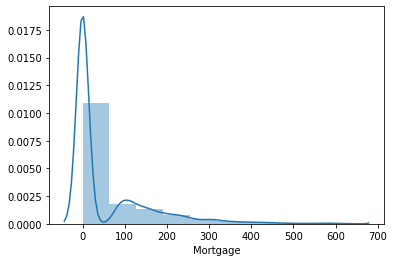

In [15]:
sns.distplot(bpl_df['Mortgage'], hist= True, kde= True, bins=10)

## INDEPENDENT VARIABLE COLOUMN'S OBSERVATION: 

### 1. Under Experience Attributes, there is a strong Linear Dependency, and we verified the same with high correlation value of 0.994215 between Experience and Age. 

### 2. Under Experience Attributes we can see there are some negative values i.e. -3,-2,-1 which is not possible. If we were to keep Experience Column in model, we had to replace these negative values with Mean(Experience). But since we are dropping Experience column, we are skipping this step.

### 3. There are no perfect gaussian distribution, all the attributes have skewed distribution. Only Age and Experience have a squashed Gaussian distribution.

### 4. CCAvg and Mortgage attribute have a long right tail signifying presence of Outliers which will affect model's performance.

### 5. Hence, we should drop Experience Column from the Dataframe.

In [16]:

#Dropping Experience Column
bpl_df= bpl_df.drop('Experience', axis=1 )
bpl_df.head(5)


,Age,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Grad,Education_Undergrad
0,25,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,45,4,1.0,0,0,0,0,0,1,0,1,0


----------------------------------------------------------------------------------------
# Analysis of Target Column -> Personal Loan
#### The Target Column is selected as Personal Loan, because we have to predict with model what is the likingness of a Customer taking up a Personal Loan(Dependent Attribute), because of being affected with all given other (Independent)attributes.
----------------------------------------------------------------------------------------


## 1. Graphical Analysis of Target Column's Distribution

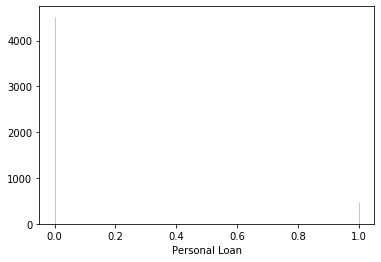

In [47]:
sns.distplot(bpl_df['Personal Loan'], hist= True, kde= False, bins=1000, color = "green", hist_kws= {'edgecolor' :'olive'})

## 2. Numerical Analysis of Target Column

In [ ]:
bpl_df.groupby(['Personal Loan']).count()

# NOTE : 
## 1. There are two Class in Target Column : Liablity Customer Class(With Personal Loan = 0) and Asset Customer Class(With Personal Loan = 1)
## 1. Here we can see that the class distribution among Customers Liablity Customers : Asset Customers is almost 10:1
## 2. Hence, with the given dataset, the derived model may have an excellent ability of predicting Liablity Customer Classs/Personal Loan=0 cases. But the class level accuracy for Asset Customer Class/Personal Loan=1 will be comparitively lower.
## 3. This prediction's accuracy parity can be checked from Confusion Matrix Analysis.
## 4. Hence, our model should identify the potential "Asset Customer Class" out of all Customers in the population.

----------------------------------------------------------------------------------------
# Scaling of all values with Z-Score
### It is advisable to scale numeric attributes in models that calculate distances
----------------------------------------------------------------------------------------

In [21]:
# Creating separate DF for Independent Variables before normalizing

bpl_feature_df = bpl_df.drop(labels='Personal Loan', axis= 1)

bpl_feature_df.shape

(5000, 12)

In [22]:
bpl_feature_df_z = bpl_feature_df.apply(zscore)

bpl_feature_df_z.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,2.478018e-17,1.0001,-1.948906,-0.901970,-0.029524,0.842923,1.889859
Income,5000.0,1.939449e-16,1.0001,-1.428969,-0.755483,-0.212348,0.526315,3.263712
Family,5000.0,7.850609e-16,1.0001,-1.216855,-1.216855,-0.345432,0.525991,1.397414
CCAvg,5000.0,-2.078338e-17,1.0001,-1.108987,-0.708412,-0.250611,0.321641,4.613525
Mortgage,5000.0,2.810197e-16,1.0001,-0.555524,-0.555524,-0.555524,0.437558,5.688108
Securities Account,5000.0,5.092149e-16,1.0001,-0.341423,-0.341423,-0.341423,-0.341423,2.928915
CD Account,5000.0,4.426903e-16,1.0001,-0.253540,-0.253540,-0.253540,-0.253540,3.944146
Online,5000.0,2.986500e-16,1.0001,-1.216618,-1.216618,0.821951,0.821951,0.821951
CreditCard,5000.0,-3.697931e-16,1.0001,-0.645314,-0.645314,-0.645314,1.549632,1.549632
Education_Advanced,5000.0,-3.148592e-17,1.0001,-0.654965,-0.654965,-0.654965,1.526798,1.526798


# NOTE:
### From above analysis of bpl_feature_df_z we can confirm that the data are dimensionless and normalised and has been rescaled withing comparable range

----------------------------------------------------------------------------------------
# Creating Separate Dataframe for Independent and Target/Dependent Variables
----------------------------------------------------------------------------------------

In [23]:
# Dependent/Target Variables

bpl_labels = bpl_df["Personal Loan"]

bpl_labels.shape

(5000,)

In [24]:
# store the normalized features data into np array 

X = np.array(bpl_feature_df_z)

X.shape

(5000, 12)

In [25]:
# store the bc_labels data into a separate np array

y = np.array(bpl_labels)

y.shape

(5000,)

----------------------------------------------------------------------------------------
# Splitting Training/Testing data into 70:30 ratio
----------------------------------------------------------------------------------------

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)


# OUR CONFUSION MATRIX
                Predicted  Predicted  
                 Liablity   Asset  
                     _        _
                    |          |
    Actual Liablity |  TP  FN  | 
                    |          |   
    Actual Asset    |  FP  TN  |
                    |_        _|


### True Positives  (TP): Liablity Customers (Bank will pay the Customer)

### False Negatives (FN): Actual Liablity Customers, but misidentified as Asset Customers

### False Positives  (FP): Actual Asset Customers, but misclassified as Liablity Customers

### True Negatives (TN): Asset Customers (Customer will pay the Bank)

# -----------------------------IMPORTANT OBSERVATION----------------------------------
# False Positive and True Negative in our case are interesting because they represent Asset Customer's Class who had taken a personal loan from Thera bank in past scheme. So in future our model needs to identify potential Asset Customer Class out of all customers for better targeted marketing campaign.

# HENCE, A LOW FALSE POSITIVE VALUE REPRESENTING HIGH CLASS LEVEL ACCURACY IS DESIRABLE.
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

----------------------------------------------------------------------------------------
# KNN ITERATION-1
----------------------------------------------------------------------------------------

## 1. Setting Nearest Neighbors = 3

In [27]:

NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )


## 2. Calling KNN Algorithm function

In [28]:

NNH.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

## 3. Computing the Score

In [29]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will be assigned to the test data point

y_predict = NNH.predict(X_test)

print(NNH.score(X_test, y_test))

print("\n Confusion Matrix is : \n", metrics.confusion_matrix(y_test, y_predict))

0.9566666666666667

 Confusion Matrix is : 
 [[1341   10]
 [  55   94]]


----------------------------------------------------------------------------------------
# KNN ITERATION-2
----------------------------------------------------------------------------------------

## 1. Setting Nearest Neighbors = 5

In [30]:

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


## 2. Calling KNN Algorithm function

In [31]:

NNH.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

## 3. Computing the Score

In [32]:
# For every test data point, predict it's label based on 3 nearest neighbours in this model. The majority class will be assigned to the test data point

y_predict = NNH.predict(X_test)

print(NNH.score(X_test, y_test))

print("\n Confusion Matrix is : \n", metrics.confusion_matrix(y_test, y_predict))

0.9586666666666667

 Confusion Matrix is : 
 [[1347    4]
 [  58   91]]


----------------------------------------------------------------------------------------
# KNN ITERATION-3
----------------------------------------------------------------------------------------

## 1. Setting Nearest Neighbors = 7

In [33]:

NNH = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )


## 2. Calling KNN Algorithm function

In [34]:

NNH.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

## 3. Computing the Score

In [35]:
# For every test data point, predict it's label based on 7 nearest neighbours in this model. The majority class will be assigned to the test data point

y_predict = NNH.predict(X_test)

print(NNH.score(X_test, y_test))

print("\n Confusion Matrix is : \n",metrics.confusion_matrix(y_test, y_predict))

0.9566666666666667

 Confusion Matrix is : 
 [[1348    3]
 [  62   87]]


----------------------------------------------------------------------------------------
# LOGISTIC REGRESSION ITERATION - 1
----------------------------------------------------------------------------------------
### Solver : Default(liblinear)

In [36]:
model = LogisticRegression(solver='liblinear')

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [37]:
model_score = model.score(X_test, y_test)

print(model_score)

print("\n Confusion Matrix is : \n",metrics.confusion_matrix(y_test, y_predict))

0.958

 Confusion Matrix is : 
 [[1340   11]
 [  52   97]]


----------------------------------------------------------------------------------------
# LOGISTIC REGRESSION ITERATION - 2
----------------------------------------------------------------------------------------
### Solver : Newton-CG

In [38]:
model = LogisticRegression(solver='newton-cg')

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [39]:
model_score = model.score(X_test, y_test)

print(model_score)

print("\n Confusion Matrix is : \n",metrics.confusion_matrix(y_test, y_predict))

0.9586666666666667

 Confusion Matrix is : 
 [[1340   11]
 [  51   98]]


----------------------------------------------------------------------------------------
# LOGISTIC REGRESSION ITERATION - 3
----------------------------------------------------------------------------------------
### Solver : LBFGS

In [40]:
model = LogisticRegression(solver='lbfgs')

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [41]:
model_score = model.score(X_test, y_test)

print(model_score)

print("\n Confusion Matrix is : \n",metrics.confusion_matrix(y_test, y_predict))

0.9586666666666667

 Confusion Matrix is : 
 [[1340   11]
 [  51   98]]


----------------------------------------------------------------------------------------
# LOGISTIC REGRESSION ITERATION - 4
----------------------------------------------------------------------------------------
### Solver : Sag

In [42]:
model = LogisticRegression(solver='sag')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [43]:
model_score = model.score(X_test, y_test)

print(model_score)

print("\n Confusion Matrix is : \n", metrics.confusion_matrix(y_test, y_predict))

0.9586666666666667

 Confusion Matrix is : 
 [[1340   11]
 [  51   98]]


----------------------------------------------------------------------------------------
# NAIVE BAYES MODEL
----------------------------------------------------------------------------------------

In [44]:
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [45]:
model_score = metrics.accuracy_score(y_test, y_predict)

print(model_score)

print(metrics.confusion_matrix(y_test, y_predict))

0.8866666666666667
[[1243  108]
 [  62   87]]


-----------------

# KNN SCORES :
###  Nearest Neighbours = 3 --> Score=95.66 | FP-55
###  Nearest Neighbours = 5 --> Score=95.86 | FP-58 
###  Nearest Neighbours = 7 --> Score=95.66 | FP-62


# LOGISTIC REGRESSION SCORES
### Solver : liblinear-----> Score=95.80 | FP=52
### Solver : Newton CG-> Score=95.86 | FP=51
### Solver : LBFGS-------> Score=95.86 | FP=51
### Solver : Sag----------> Score=95.86 | FP=51


# NAIVE BAYES SCORES
### Score=88.66 | FP=62

# -------------------------------CONCLUSION---------------------------------

## Hence, as per above Scores and FP values we should use Logistic Regression Model (with newton-cg/lbfgs/sag solver) as this model has highest Score i.e. 95.86 and lowest FN value of 51 with a class level accuracy of 98/(51+98) = 65.77%. 

## But, this value can still improve if we can add further test/train data under Asset Class Customers or who had taken loan under previous scheme.